In trading, the price we receive is a collection of data points at constant time intervals called time series. They are time dependent and can have increasing or decreasing trends and seasonality trends, in other words, variations specific to a particular time frame. Like any other retail products, financial products follow trends and seasonality during different seasons. There are multiple seasonality effects: weekend, monthly, and holidays.

In [1]:
import statistics as stats
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data
import sys

For the sake of understaning, I have used data from pre-covid times.First and then same proceedure is used for data 
including covid times.

In [2]:
start_date = '2001-01-01'
end_date = '2018-01-01'
symbol = 'TATAMOTORS.NS'
SRC_DATA_FILENAME=sys.path[0][:-9]+'stocks/'+symbol+'_large.pkl'

In [3]:
try:
    stock_data = pd.read_pickle(SRC_DATA_FILENAME)
except FileNotFoundError:
    stock_data = data.DataReader(symbol, 'yahoo', start_date,end_date)
    stock_data.to_pickle(SRC_DATA_FILENAME)

In [4]:
stock_monthly_return = stock_data['Adj Close'].pct_change().groupby(
              [stock_data['Adj Close'].index.year,
               stock_data['Adj Close'].index.month]).mean()

In [5]:
stock_monthly_return_list = []
for i in range(len(stock_monthly_return)):
    stock_monthly_return_list.append({'month':stock_monthly_return.index[i][1],
                                      'monthly return':stock_monthly_return.iloc[i]})
stock_monthly_return_list = pd.DataFrame(stock_monthly_return_list)

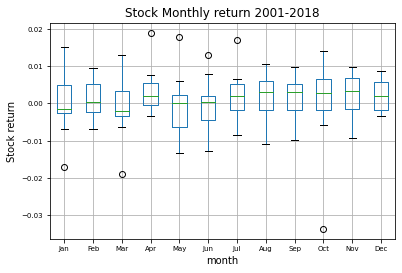

In [6]:
stock_monthly_return_list.boxplot(column='monthly return',
   by='month')
ax = plt.gca()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels=['Jan','Feb','Mar','Apr','May','Jun',
     'Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(labels)
ax.set_ylabel('Stock return')
plt.tick_params(axis='both', which='major', labelsize=7)
plt.title("Stock Monthly return 2001-2018")
plt.suptitle("")
plt.show()

Since it is a time series, we will study the stationary (mean, variance remain constant over time). In the following code, we will check this property because the following time series models work on the assumption that time series are stationary:

            Constant mean
            Constant variance Time-independent autocovariance

In [7]:
def plot_rolling_statistics_ts(ts, titletext,ytext,window_size=20):
    ts.plot(color='red', label='Original', lw=0.5)
    ts.rolling(window_size).mean().plot(color='blue',label='Rolling Mean')
    ts.rolling(window_size).std().plot(color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.ylabel(ytext)
    plt.title(titletext)
    plt.show(block=False)

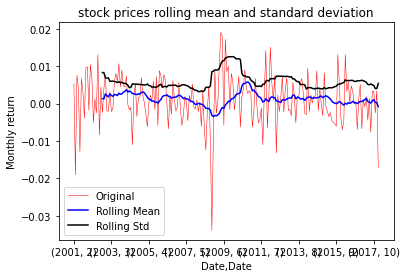

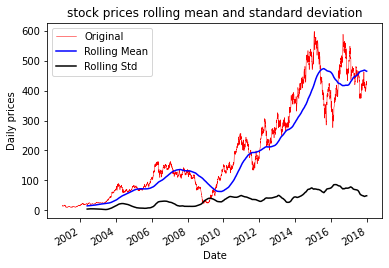

In [8]:
plot_rolling_statistics_ts(stock_monthly_return[1:],'stock prices rolling mean and standard deviation',
                'Monthly return')
plot_rolling_statistics_ts(stock_data['Adj Close'],'stock prices rolling mean and standard deviation',
                           'Daily prices',365)

In [11]:
stock_monthly_return_list

,month,monthly return
0,1,0.002937
1,2,0.005307
2,3,-0.019045
3,4,0.007601
4,5,0.003963
...,...,...
200,9,0.003246
201,10,0.003372
202,11,-0.002476
203,12,0.003410
